In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

# Solving linear regression
## Create synthetic data

In [8]:
gt_samples = 1000
gt_noise = 10
gt_bias = 13
gt_random_state = 42

ground truth coef = 16.7483, bias = 13.0000


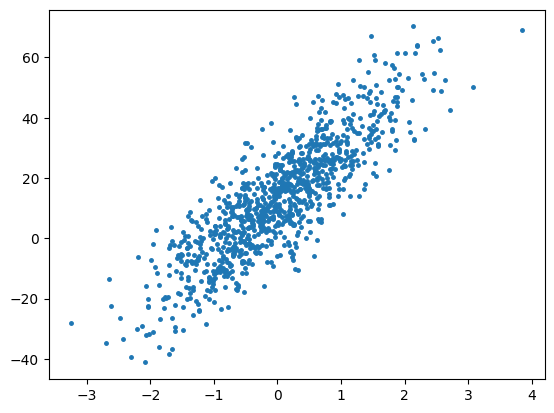

In [2]:
X, y, gt_coef = make_regression(
    n_samples=gt_samples, 
    n_features=1, 
    bias=gt_bias, 
    noise=gt_noise, 
    coef=True, 
    random_state=gt_random_state
)
x = X.reshape(-1)
plt.plot(x, y, '.', markersize=5)
print(f'ground truth coef = {gt_coef:.04f}, bias = {gt_bias:.04f}')

In [3]:
pd.DataFrame(np.stack((x, y), axis=1), columns=('x', 'y')) \
    .to_csv('./data/data.csv', index=False)

## np.linalg model

np.linalg coef=16.6335, bias=13.0453


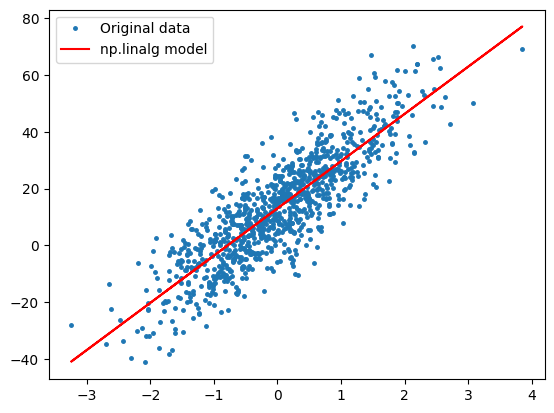

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
coef, bias = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'np.linalg coef={coef:.04f}, bias={bias:.04f}')

plt.plot(x, y, '.', label='Original data', markersize=5)
plt.plot(x, coef*x + bias, 'r', label='np.linalg model')
plt.legend()
plt.show()

### Timing

In [5]:
%%timeit
np.linalg.lstsq(A, y, rcond=None)[0]

47.8 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## sklearn.linear_model

sklearn.linear_model coef=16.6335, bias=13.0453


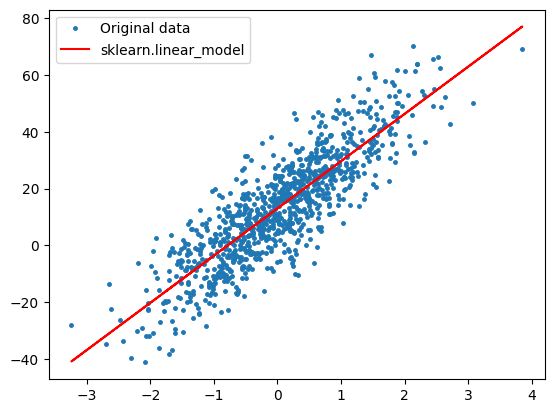

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
bias = model.intercept_
coef = model.coef_[0]
print(f'sklearn.linear_model coef={coef:.04f}, bias={bias:.04f}')

plt.plot(x, y, '.', label='Original data', markersize=5)
plt.plot(x, coef*x + bias, 'r', label='sklearn.linear_model')
plt.legend()
plt.show()

### Timing

In [7]:
%%timeit
model.fit(X, y)

663 µs ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
